# DDU Training workbook: Isosteric replacements

(c) Cedric Graebin - Medicinal Chemisry Trainer, [University of Dundee](https://drugdiscovery.dundee.ac.uk), Scotland, UK.
This workbook is licensed under a permissive license.

The isosteric replacements datatable was based on the work of Peter Ertl, obtained from Ertl, P. *J. Chem. Inf. Model*. **2020**, *60*, 7, 3369–3375. DOI: [10.1021/acs.jcim.0c00290](https://doi.org/10.1021/acs.jcim.0c00290).

## Goals

The main goal of this notebook is to show you how you can use [Python](https://www.python.org), the [RDKit chemistry toolkit](https://www.rdkit.org) and a database of isosteric replacements to apply these transformations to a molecule of your choice. In the end, you will get an enumeration - *i.e.*: a list of compounds that are the result of these isosteric replacements. 

We will be using the non-steroid antiinflammatory drug [Celecoxib](https://en.wikipedia.org/wiki/Celecoxib) as an example for this exercise. 

The notebook will have questions formatted as blockquotes to help you go through the content. The questions are designed for you to check on your results and make sense of the data you're getting as a result:

> **Question:**
>
> This is an example question

The answers will be at the end of the document

### Before you begin, please make sure that:

- you have your conda installation already set up with the tools required to run this notebook. Please refer to [this guide (Code Academy)](https://www.codecademy.com/article/setting-up-jupyter-notebook) on how to install both.
- your conda environment has RDKit and Pandas installed. The official conda documentation has [guides on how to do this](https://docs.anaconda.com/working-with-conda/packages/install-packages/) if you're unsure.
- also, make sure that the folder where this notebook is saved also contains the prepared isosteric database file `isosteric_replacement_table.csv` saved in it. This notebook will not run if that file is not present.

### Also:

Maybe this would be a good time to brush up your knowledge about isosteres and isosteric replacements? Here are some links as suggestions for a more detailed reading on the matter:
- The Influence of Bioisosteres in Drug Design: Tactical Applications to Address Developability Problems, by Nicholas Meanwell. Tactics in Contemporary Drug Design. 2014 Jan 28;9:283–381. ([Link to PubMed](https://pmc.ncbi.nlm.nih.gov/articles/PMC7416817/))
- Bioisosterism, by Christopher McCurdy and Claude Cohen. ([Link to the resource](https://www.drugdesign.org/chapters/bioisosterism/))

### How to run this notebook?

If you have your conda setup and jupyter lab or notebook installed, you are probably ready to run! You can execute each code block at a time by pressing `Shift+Enter`. In some instances, you'll be asked to check the results (which will be displayed below each block) before continue. Take your time and have some fun!

### Ready to go?

If you're ready, select the block below and press "play" or press `Shift+Enter` in your keyboard to advance the code blocks. 


## 1. First things first

We need to instruct Python to load some required modules - RDKit to process the chemical structures and perform the reactions, and [pandas](https://pandas.pydata.org/) to help us to manipulate the datasets we'll need to use.

In [10]:
# import required Python modules (RDKit and Pandas)
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions
import pandas as pd

# Drawing options
DrawingOptions.bondLineWidth=1.2
DrawingOptions.atomLabelFontSize=20
DrawingOptions.includeAtomNumbers=False

# Pandas Options
pd.set_option("display.max_rows", 20)

After that,  we will input the structure of Celecoxib into the code, using the [SMARTS](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification) language to describe the chemical structure.

The next block will also output the structure as a drawing, so you can check if everything is correct with it.

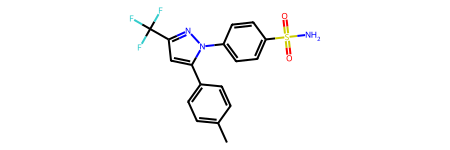

In [11]:
# input the molecule from which the isosteric replacements will be applied to. 
# default is Celecoxib => SMILES = "Cc1ccc(cc1)c1cc(nn1c1ccc(cc1)S(=O)(=O)N)C(F)(F)F"
molecule = Chem.MolFromSmiles("Cc1ccc(cc1)c1cc(nn1c1ccc(cc1)S(=O)(=O)N)C(F)(F)F")

# Display the molecule
molecule

## 2. Loading the isosteric replacements dataset

If everything is correct with the structure, the next step is to load the database of isosteric replacements (`isostere_replacement_table.csv`) adapted from the work of [Peter Ertl](https://peter-ertl.com/) (see reference on the top of this notebook) as a `DataFrame`. Think of it as a table with rows and columns (which a DataFrame is) that we can manipulate, change, edit, and filter, among other data transformations. 

On the code below, we are using the `sep="\t"` parameter to specify that the file has its data columns separated by tabulations.

In [12]:
# load the isostere database
isosteres = pd.read_csv("isostere_replacement_table.csv", sep="\t")

We can quickly check if everything is okay with the table by using the `.head()` and `.tail()` methods to extract the first and last rows of the DataFrame.

In [13]:
# check the table structure - head() gives out the first rows of a dataframe
isosteres.head()

,R_group,Substitution count,R-group to search for,Isostere substitution,Reaction (SMARTS)
0,C[*],14613,[#6&D1]-*,[#6&D1]-[#6&D2]-*,[#6&D1]-[*:1]>>[#6&D1]-[#6&D2]-[*:1]
1,C[*],11518,[#6&D1]-*,[#17&D1]-*,[#6&D1]-[*:1]>>[#17&D1]-[*:1]
2,C[*],8873,[#6&D1]-*,[#6&D1]-[#8&D2]-*,[#6&D1]-[*:1]>>[#6&D1]-[#8&D2]-[*:1]
3,C[*],8034,[#6&D1]-*,[#9&D1]-*,[#6&D1]-[*:1]>>[#9&D1]-[*:1]
4,C[*],5975,[#6&D1]-*,[#9&D1]-[#6&D4](-[#9&D1])(-[#9&D1])-*,[#6&D1]-[*:1]>>[#9&D1]-[#6&D4](-[#9&D1])(-[#9&...


In [9]:
# tail, on the other hand, gives out the last rows on a dataframe
isosteres.tail()

,R_group,Substitution count,R-group to search for,Isostere substitution,Reaction (SMARTS)
3995,C1COCCN1C[*],78,[#6]1-[#6]-[#8]-[#6]-[#6]-[#7]-1-[#6&D2]-*,[#7&D1]-[#6&D2]-*,[#6]1-[#6]-[#8]-[#6]-[#6]-[#7]-1-[#6&D2]-[*:1]...
3996,N=C(N)N(C)C[*],76,[#7&D1]=[#6&D3](-[#7&D1])-[#7&D3](-[#6&D1])-[#...,[#7&D1]-[#6&D2]-*,[#7&D1]=[#6&D3](-[#7&D1])-[#7&D3](-[#6&D1])-[#...
3997,C1CCCN1C[*],69,[#6]1-[#6]-[#6]-[#6]-[#7]-1-[#6&D2]-*,[#7&D1]-[#6&D2]-*,[#6]1-[#6]-[#6]-[#6]-[#7]-1-[#6&D2]-[*:1]>>[#7...
3998,C#C[*],72,[#6&D1]#[#6&D2]-*,[#53&D1]-*,[#6&D1]#[#6&D2]-[*:1]>>[#53&D1]-[*:1]
3999,C1CCCC1N[*],160,[#6]1-[#6]-[#6]-[#6]-[#6]-1-[#7&D2]-*,[#6&D1]-[#6&D2]-[#7&D2]-*,[#6]1-[#6]-[#6]-[#6]-[#6]-1-[#7&D2]-[*:1]>>[#6...


Assuming that everything is okay,

> **Question:**
>
> How many rows does the DataFrame table have?

We will proceed with the exercise. You may have noted that the 5 first rows of the table have the same R-group, `C[*]`. On SMILES notation, this can be interpreted as `methyl group attached to any atom except Hydrogen`. In order to know which isosteric replacements are going to be made, we need to know which functional groups are present in Celecoxib's structure that can be replaced. We could simply check every row of the table, but this can be time consuming, considering that we have thousands of rows!

We could speed up the search by filtering the table and getting only the *unique* items in it. `pandas` has a method for this, the `unique()` method.

Let us create two `series`, for the columns with the structures in both SMILES and [SMARTS](https://www.daylight.com/dayhtml_tutorials/languages/smarts/) formats, and then we'll use `len` to have the number of items (or its *length*) in it.

In [15]:
# Gets the unique values (SMILES and SMARTS) from the Isosteres table
unique_R_groups_smiles = isosteres["R_group"].unique()
unique_R_groups_smarts = isosteres["R-group to search for"].unique()

# how many unique itens does these lists have?
print("Number of items: ", str(len(unique_R_groups_smiles)))

Number of items:  407


Now, we're going to search, in our molecule, how many of these R-groups can be found. We will use the `HasSubstructMatch` method to check if our molecule has a particular substructure. This method is going to be run in a iteration against every row in our table with the unique R-groups and it will return `True` or `False`, indicating whether the substructure can be found or not in our molecule. 

What matters to us, in this exercise, are the R-groups that were found. The `query()` method will help us to filter down the table so we'll be dealing only with the positive matches.

In [16]:
# creates a new, empty DataFrame that will check if the R-group was found (True) or not (False) in the isosteres database
r_groups_found = pd.DataFrame()
r_groups_found["R-group to be searched for"] = unique_R_groups_smiles
r_groups_found["Found"] = [molecule.HasSubstructMatch(Chem.MolFromSmarts(smarts_pattern)) for smarts_pattern in unique_R_groups_smarts]
r_groups_found_filtered = r_groups_found.query("Found == True")
r_groups_found_filtered

,R-group to be searched for,Found
0,C[*],True
2,F[*],True
3,N[*],True
4,c1ccccc1[*],True
11,FC(F)(F)[*],True
43,NS(=O)(=O)[*],True
48,c1cc(C)ccc1[*],True
86,c1cc(S(N)(=O)=O)ccc1[*],True
181,c1ccccc1S(=O)(=O)[*],True


The SMILES representation of a molecule doesn't help a lot, does it?

Maybe we'll can do something better. RDKit can convert the SMARTS code into molecules and render them as drawings, *inside the DataFrame*, and then display the table back to us.

C:\Users\CGraebin001\AppData\Local\miniconda3\lib\site-packages\rdkit\Chem\PandasTools.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,R-group to be searched for,Found,R-groups (RDKit)
0,C[*],True,
2,F[*],True,
3,N[*],True,
4,c1ccccc1[*],True,
11,FC(F)(F)[*],True,
43,NS(=O)(=O)[*],True,
48,c1cc(C)ccc1[*],True,
86,c1cc(S(N)(=O)=O)ccc1[*],True,
181,c1ccccc1S(=O)(=O)[*],True,

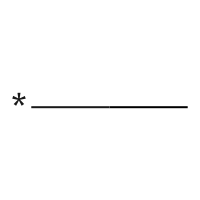
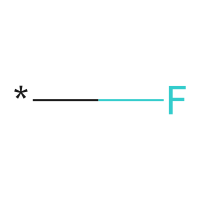
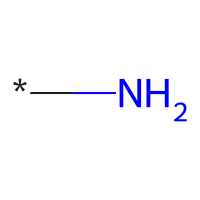
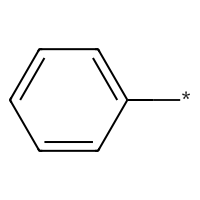
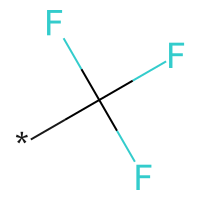
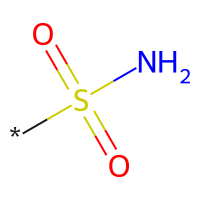
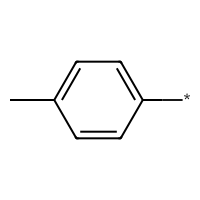
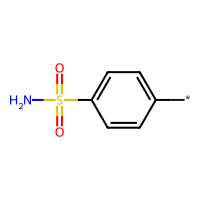
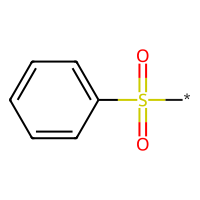

In [17]:
# adds the RDKit Molecule representation of the SMILES structures to the table using RDKit's PandasTools
PandasTools.AddMoleculeColumnToFrame(r_groups_found_filtered, 
                                     "R-group to be searched for", 
                                     "R-groups (RDKit)", 
                                     False)

# display the DataTable so the user can choose which rows to keep for the enumeration
r_groups_found_filtered

> **Question:**
>
> How many R-groups were found in Celecoxib's structure? What can you make of these results?


You'll notice that some of the results do *overlap*. We have, for example, a C-F bond and a CF3 bond. They refer to the same group because there is only one part of the molecule with C-F bonds. In other words, *C-F is a substructure of CF3*. 

The same can be seen with the benzene / methylbenzene, and the phenylsulfone / phenylsulfonamide / amine moieties. We don't need to run the isosteric replacements for all of them. 

What we can do is to filter further down the `DataFrame`, using the `.iloc()` method to pick and choose which rows we want to run the isosteric replacements. For this example, let us pick the methyl (index 0), trifluoromethyl (index 11), sulfonamide (index 43), and the methylbenzene (index 48) units and then check the results.

In [18]:
# creates a new DataFrame filtering only the selected indexes
# or, in plain English: which R-groups would you like to propose isosteric replacements?
r_groups_to_apply = r_groups_found.iloc[[0, 11, 43, 48]]

# displays the filtered DataTable
r_groups_to_apply

,R-group to be searched for,Found
0,C[*],True
11,FC(F)(F)[*],True
43,NS(=O)(=O)[*],True
48,c1cc(C)ccc1[*],True


Now, we're going back to the table that we imported from the CSV file, `isosteres`. First, we will filter this table to keep only the rows in which the R-groups we selected are present. The `.apply()` method will do that to us.

At this moment, what matters to us is the column that contain the transformations we want to apply as SMARTS. We'll output this column as a `Series` object.

In [22]:
# gets a new DataFrame whose R-groups from the isosteres database match the chosen R-groups from the r_groups_to_apply
# dataframe
transformations = isosteres.apply(lambda row: row[isosteres["R_group"].isin(r_groups_to_apply["R-group to be searched for"])])

# gets a Pandas.Series object wih the SMARTS reaction strings to iterate
reactions = transformations["Reaction (SMARTS)"]

Then, we'll iterate over all the reactions, applying all of them, one at a time, to Celecoxib (represented as `molecule`), and retrieve the products in  a `List` object. We can use again `len()` to get the number of products coming out.

In other words, this is where the enumeration (generation of a list of compounds) is happening.

In [24]:
# Here's where the chemical transformations happen. The loop uses the RDKit.AllChem.Rxn to create and run a reaction
# using the molecule as reactant, and the SMARTS as the reaction to be run. The products obtained as results are stored
# as a Python list object
enumerated_replacements_smiles = []
for index, item in reactions.items():
    rxn = AllChem.ReactionFromSmarts(item)
    products = rxn.RunReactants([molecule])
    enumerated_replacements_smiles.append(Chem.MolToSmiles(products[0][0]))

# How many products were obtained?
len(enumerated_replacements_smiles)

193

There is a possibility, though, that different reactions led to the same product at the end. We'll make sure that there are no duplicate structures by using `unique()` again.

In [28]:
# creates the result DataTable with the molecules as SMARTS
enumerated_molecules = pd.DataFrame(enumerated_replacements_smiles, columns=["Suggestions (SMILES)"])

# removes duplicates based on the column with SMILES structures and re-creates the DataFrame
enumerated_molecules = pd.DataFrame(enumerated_molecules["Suggestions (SMILES)"].unique(), columns=["Suggestions (SMILES)"]).reset_index(drop=True)

Almost there! In order for us to visually inspect the enumerated compounds, we'll use RDKit to render the compounds as drawings, so we can actually see which compounds are coming out of the isosteric replacements. 

,Suggestions (SMILES),Suggestions (RDKit)
0,CCc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc...,
1,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Cl)cc...,
2,COc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc...,
3,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(F)cc2...,
4,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(C(F)(...,
5,CC(C)c1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O...,
6,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(-c3cc...,
7,CCCc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)c...,
8,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccc(Br)cc...,
9,Nc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,

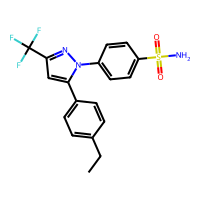
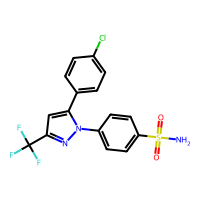
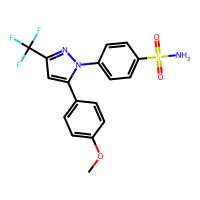
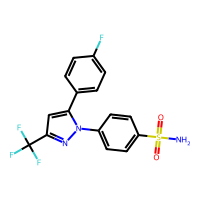
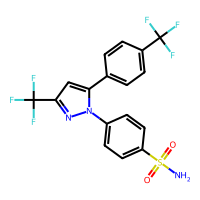
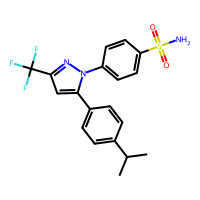
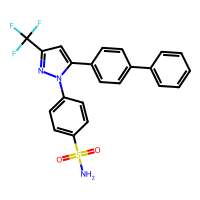
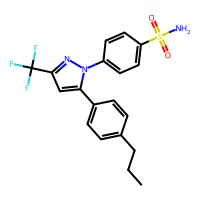
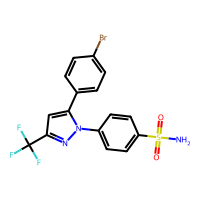
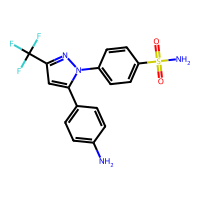
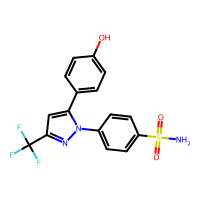
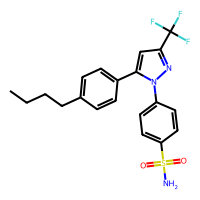
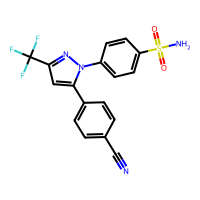
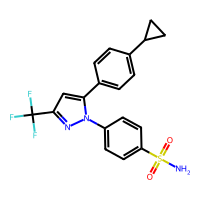
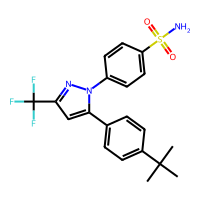
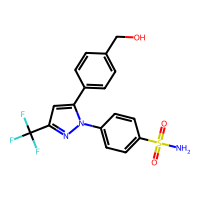
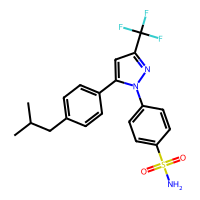
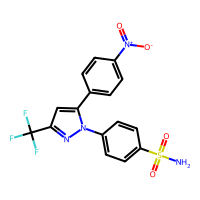
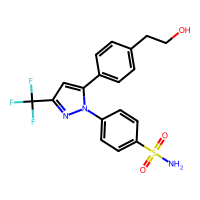
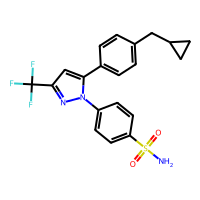
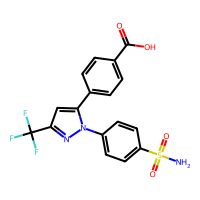
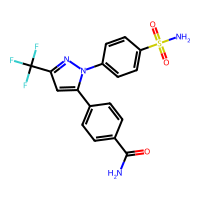
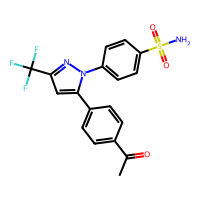
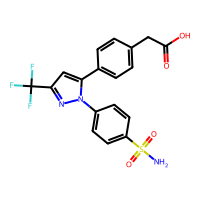
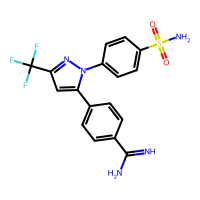
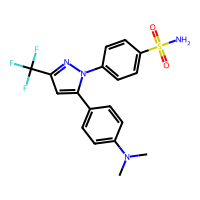
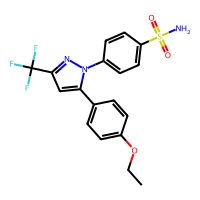
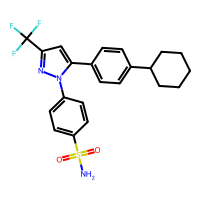
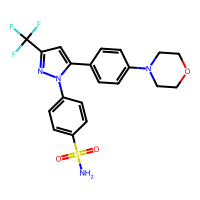
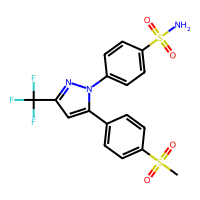
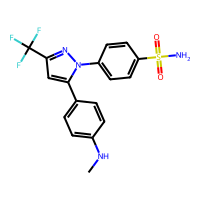
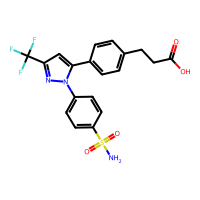
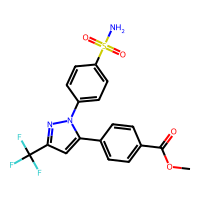
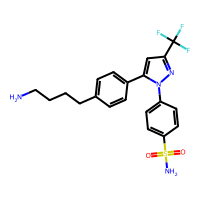
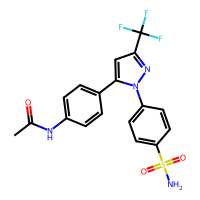
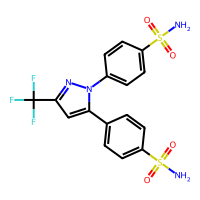
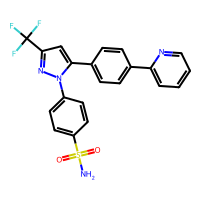
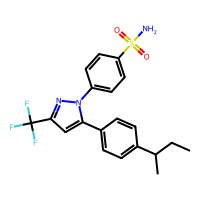
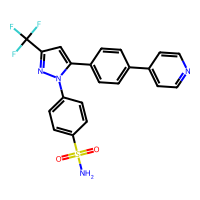
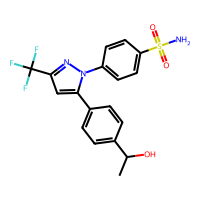
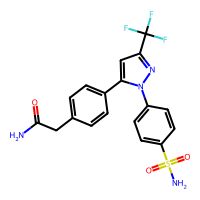
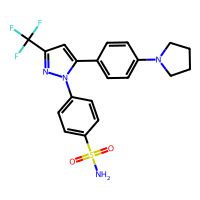
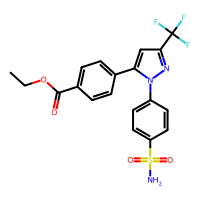
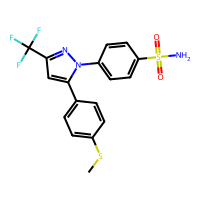
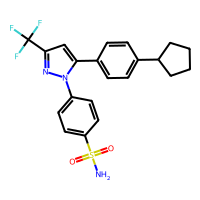
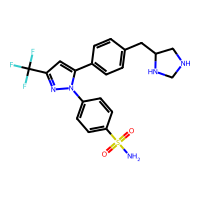
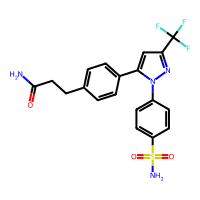
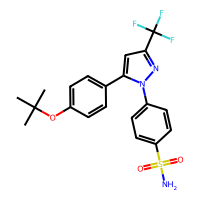
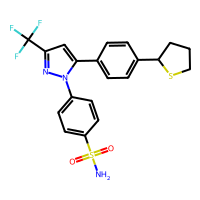
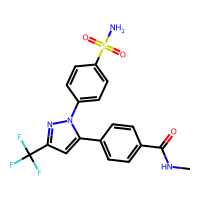
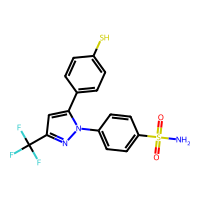
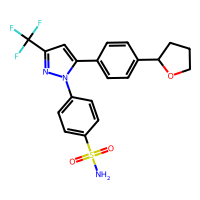
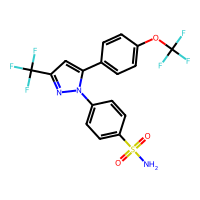
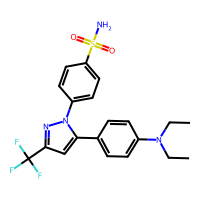
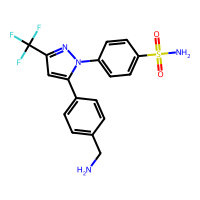
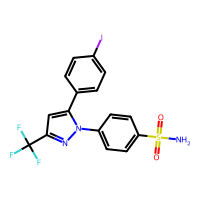
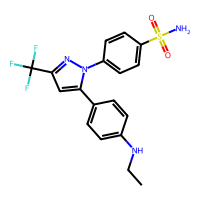
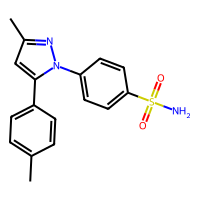
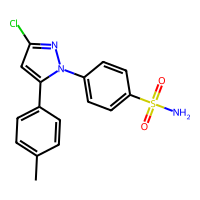
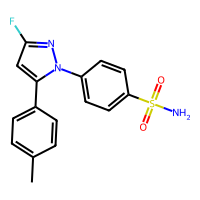
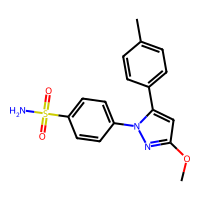
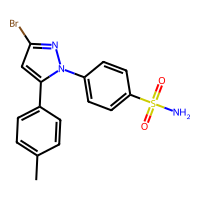
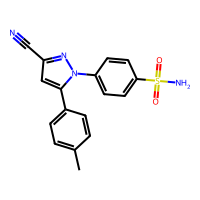
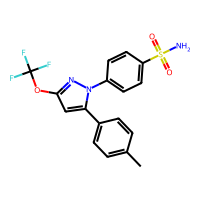
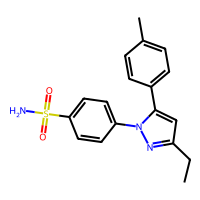
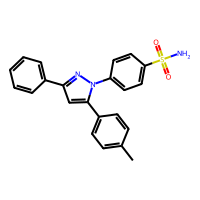
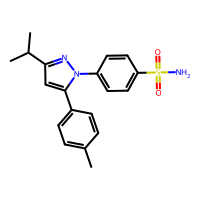
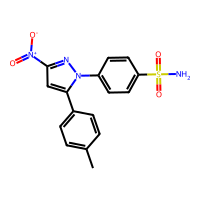
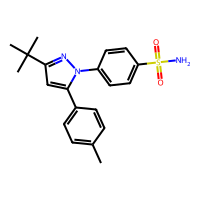
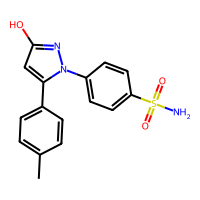
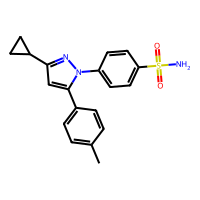
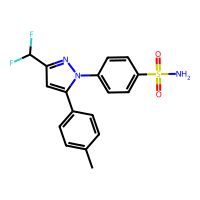
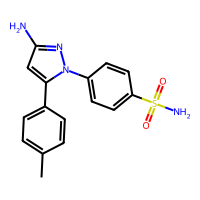
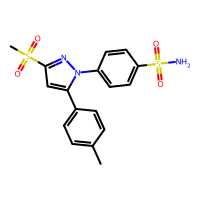
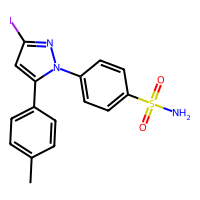
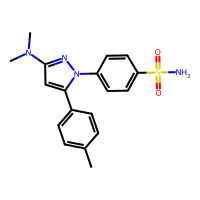
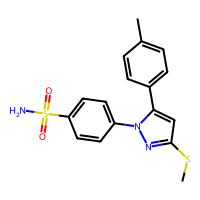
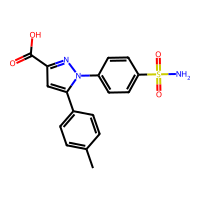
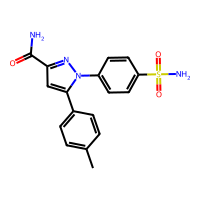
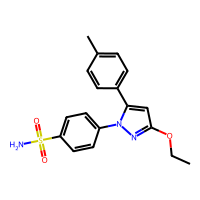
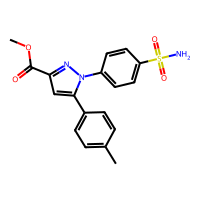
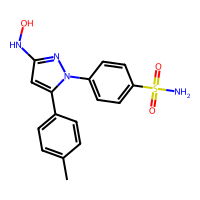
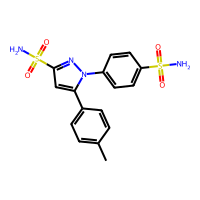
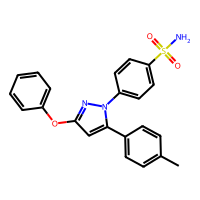
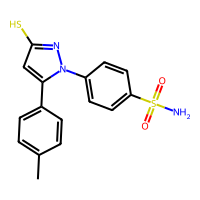
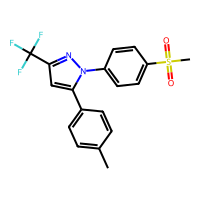
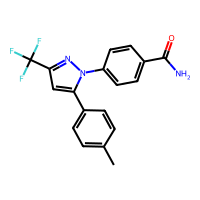
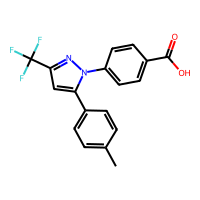
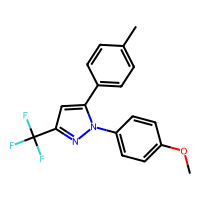
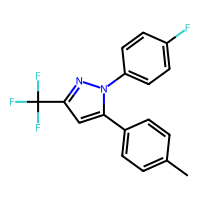
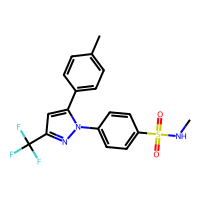
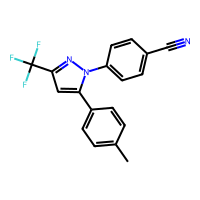
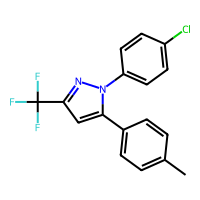
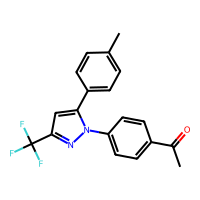
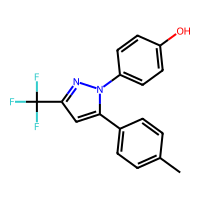
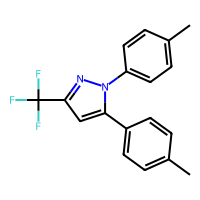
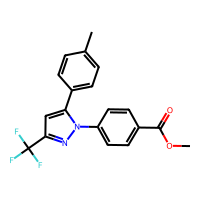
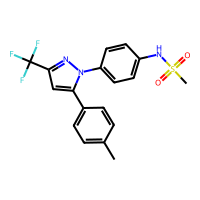
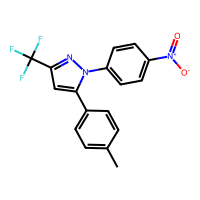
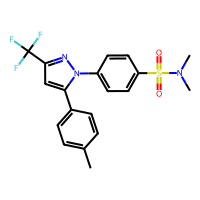
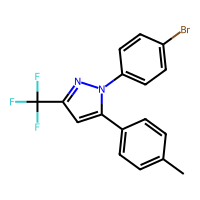
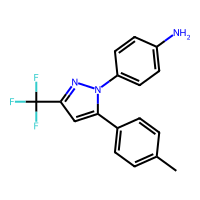
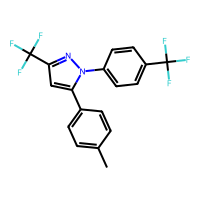
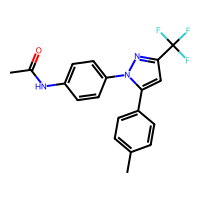
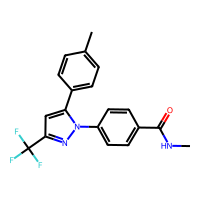
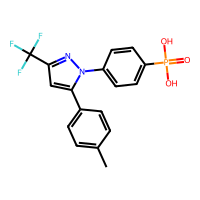
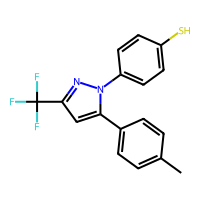
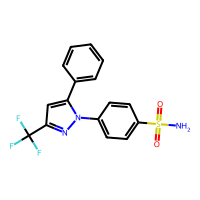
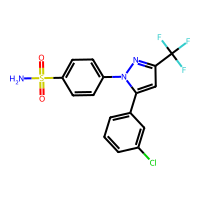
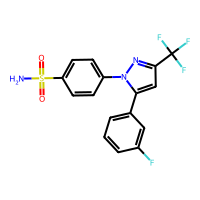
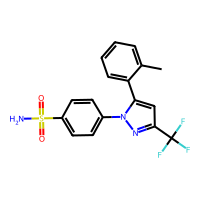
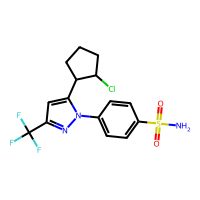
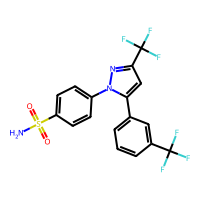
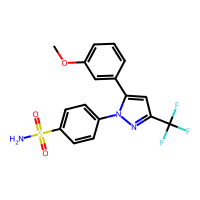
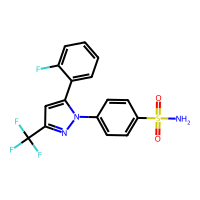
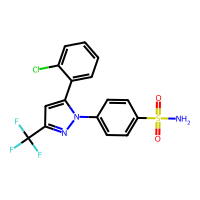
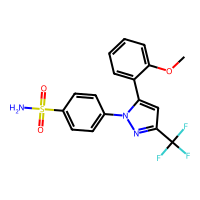
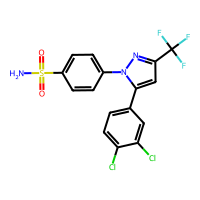
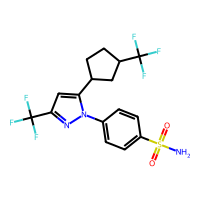
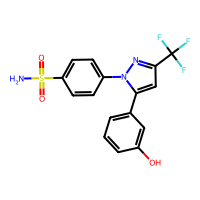
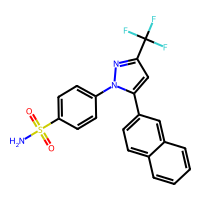
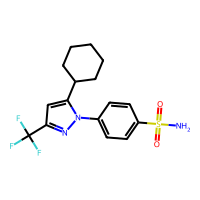
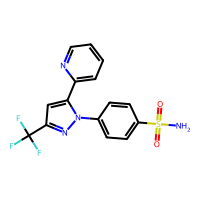
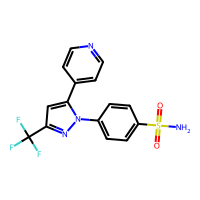
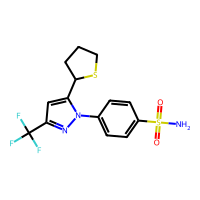
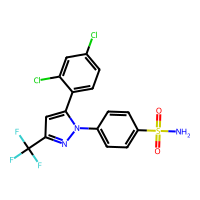
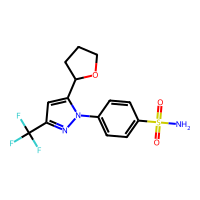
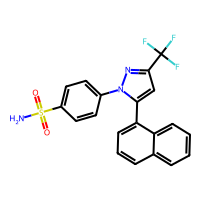

In [29]:
# adds a column with RDKit Mol objects
PandasTools.AddMoleculeColumnToFrame(enumerated_molecules, 
                                     "Suggestions (SMILES)", 
                                     "Suggestions (RDKit)", 
                                     False)

# forces Pandas to render all rows in the table and displays the final result
pd.set_option('display.max_rows', None)
enumerated_molecules

> **Question:**
>
> How many unique compounds are depicted in the table?

Now, we can export the table as a CSV file containing the structures as SMARTS. This can be used in other software packages, or queried against public chemistry databases, such as ChEMBL or PubChem. The file will be saved in the same folder where the notebook file is.


In [ ]:
# exports the result as an CSV file - only the SMILES structures for each enumerated compound
enumerated_molecules["Suggestions (SMILES)"].to_csv("enumerated_molecules.csv", index=False)

And that is it! You have learned how to use Python, pandas, and RDKit to retrieve a database of isosteric replacements, apply these replacements to a drug-like structure and get an enumeration of the compounds coming out of these replacements, and inspect the results. This is only a tiny fraction of what you can do with Python and RDKit!

### Answers to questions

*How many rows does the DataFrame table have?*  
Answer: The isosteres table (as of Dec. 2024) has 4000 rows.

*How many R-groups were found in Celecoxib's structure? What can you make of these results?*  
Answer: nine (9) R-groups from the `isosteres` table were found in Celecoxib's structure. Some of them overlap, though. This is true for the C-F and CF3, as well as other functional groups present there.

*How many unique compounds are depicted in the table?*   
Answer: 128

### Acknowledgements

The author would like to thank Dr. [Peter Ertl](https://peter-ertl.com/) for the suggestions and insightful comments on how to use the database prepared by him in this workbook.

Also, many thanks for the team developing the open-source chemistry toolkit [RDKit](https://www.rdkit.org). This notebook would exist without it.